<a href="https://colab.research.google.com/github/pibicpibitijrcommodities/pibicpibitijrcommodities/blob/main/Google_Trends_extactor_for_commodities_(grains)_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalação das bibliotecas necessárias
!pip install yfinance
!pip install pytrends
!pip install plotly
!pip install transformers
!pip install sentencepiece
!pip install torch

# Importação das bibliotecas
import yfinance as yf
from pytrends.request import TrendReq
import pandas as pd
import time
import plotly.express as px
from datetime import timedelta
import requests
from scipy.signal import find_peaks
from transformers import pipeline
import numpy as np
from plotly.subplots import make_subplots

## Python libs imports

In [ ]:

#!pip install yfinance
!pip install pytrends

#import yfinance as yf
from pytrends.request import TrendReq
import pandas as pd
import time
import plotly.express as px
import yfinance as yf


## Keywords set

(to be changed to check the results...)


In [ ]:

# Set up Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords for the Google Trends search
kw_lists = [
    ["corn prices", "corn quotes"],
    ["wheat quotes"],
    ["rice market"],
    ["cattle price returns"],
    ["soymeal"],
    ["soybeans"]
]


In [ ]:

# Set the period for the search. Example: last 5 years
timeframe = 'today 5-y'

# Store the results in a dataframe
all_trends = pd.DataFrame()

# Iterate over each keyword list and perform the search
for kw in kw_lists:
    pytrends.build_payload(kw, timeframe=timeframe)
    data = pytrends.interest_over_time()

    # Check if the 'isPartial' column exists and remove it if present
    if 'isPartial' in data.columns:
        data = data.drop(columns=['isPartial'])

    # Concatenate the data to the main dataframe
    all_trends = pd.concat([all_trends, data], axis=1)

# Display the dataframe with all the results
print(all_trends)


            corn prices  corn quotes  wheat quotes  rice market  \
date                                                              
2019-09-15           54           13            38           63   
2019-09-22           44           14             0           62   
2019-09-29           61           15            53           56   
2019-10-06           66           17            34           57   
2019-10-13           67           18            49           53   
...                 ...          ...           ...          ...   
2024-08-18           49            8             0           77   
2024-08-25           50            8            41           77   
2024-09-01           46            7            15           79   
2024-09-08           46            7            28           81   
2024-09-15           50            7            27           88   

            cattle price returns  soymeal  soybeans  
date                                                 
2019-09-15          

In [ ]:

# Convert the dataframe index to a column
all_trends.reset_index(inplace=True)

# Create the chart using Plotly
fig = px.line(all_trends, x='date', y=all_trends.columns[1:],
              labels={'value': 'Interest', 'date': 'Date'},
              title='Google Trends Over Time')

# Update the layout to improve visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Interest',
    legend_title='Keywords',
    width=1000,
    height=600
)

# Display the chart
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In the chart generated with Plotly, one can observe the trends over time for the six commodities selected: corn, wheat, rice, cattle, soymeal, and soybeans. Here is a detailed explanation of each element in the chart:

**X-Axis (Date)**

The horizontal axis represents time, ranging from 2019 to 2024. This indicates that the trends for these commodities are being visualized over approximately five years.

**Y-Axis (Interest)**

The vertical axis represents the level of interest on Google Trends, which varies from 0 to 100. A value of 100 indicates the peak popularity of a keyword during a given period, while lower values indicate less relative interest.

**Patterns and Fluctuations**

- It can be observed that all commodities exhibit fluctuations over time, with peaks and drops in interest.
- For example, the soymeal line in orange shows more sporadic peaks, indicating that interest in this commodity might be more seasonal or influenced by specific events.
- The lines for soybeans and wheat appear to have more stable fluctuations, with fewer abrupt variations.

**Interactivity**

Since the chart was generated with Plotly, it is interactive. This means that one can hover over any point on the lines to see specific details, such as the interest value on a particular date. In the shown example, the value for soymeal in October 2021 was 100, indicating the peak of interest at that time.

**Outliers and Anomalies**

The soymeal line shows very pronounced peaks and frequent drops to zero, which may indicate volatility in interest for this commodity or possible anomalies in the collected data.

This chart is useful for understanding interest trends over time, identifying seasonal patterns or events that impacted interest in these commodities, and can aid in strategic decision-making, such as in marketing or market analysis.


In [ ]:
import yfinance as yf
import pandas as pd

# Define the tickers of the financial assets
tickers = [
    "ZC=F",  # Corn Futures
    "ZO=F",  # Wheat Futures
    "KE=F",  # KC HRW Wheat Futures
    "ZR=F",  # Rough Rice Futures
    "GF=F",  # Feeder Cattle Futures
    "ZS=F",  # SoyMeal Futures
    "ZM=F",  # Soy Meal Futures
    "ZL=F"   # SoyBeans Futures
]

# Download the data for the assets
data = yf.download(tickers, start="2019-01-01")['Adj Close']

# Remove rows with NA values
data.dropna(inplace=True)

# Rename the columns to indicate returns
data.columns = [
    "ret_corn_fut",
    "ret_wheat_fut",
    "ret_KCWheat_fut",
    "ret_rice_fut",
    "ret_Feeder_Cattle",
    "ret_soymeal_fut",
    "ret_soyF_fut",
    "ret_soybeans_fut"
]

# Display an overview of the return data
print(data.tail())

# Store the results in a dataframe
# (assumption: all_trends has relevant data like dates and trends)
all_trends = pd.DataFrame()  # You would populate this with real data

# Concatenate the trends with financial returns
yf_graph = pd.concat([all_trends, data], axis=1)

# Convert the index to a column (assuming the index is date-like)
yf_graph.reset_index(inplace=True)

# Now you can perform further operations, such as plotting or analysis


[*********************100%***********************]  8 of 8 completed


                           ret_corn_fut  ret_wheat_fut  ret_KCWheat_fut  \
Date                                                                      
2024-09-10 00:00:00+00:00    238.475006         579.75           379.50   
2024-09-11 00:00:00+00:00    240.550003         580.75           380.50   
2024-09-12 00:00:00+00:00    242.050003         578.50           386.25   
2024-09-13 00:00:00+00:00    241.899994         578.50           390.75   
2024-09-16 00:00:00+00:00    241.300003         580.50           410.75   

                           ret_rice_fut  ret_Feeder_Cattle  ret_soymeal_fut  \
Date                                                                          
2024-09-10 00:00:00+00:00     40.849998         310.600006           358.25   
2024-09-11 00:00:00+00:00     40.320000         313.299988           358.75   
2024-09-12 00:00:00+00:00     40.810001         316.500000           366.25   
2024-09-13 00:00:00+00:00     40.689999         315.399994           366.25   


Code used to collect data from Yahoo Finance

## Time series graphs

In [ ]:
# Store the results in a dataframe
all_trends = pd.DataFrame()

# Concatenate the data to the main dataframe
all_trends = pd.concat([all_trends, data], axis=1)

# Convert the dataframe index to a column
all_trends.reset_index(inplace=True)

# Create the chart using Plotly
fig = px.line(all_trends, x='Date', y=all_trends.columns[1:],
              labels={'value': 'Price', 'Date': 'Date'},
              title='Price Value of Financial Assets')

# Update the layout to improve visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Assets',
    width=1000,
    height=600
)

# Display the chart
fig.show()

# Esse gráfico precisa ser refeito pra lado a lado de cada série num grafico unico...


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import pandas as pd

# Converter a coluna de data para o formato datetime
all_trends['Date'] = pd.to_datetime(all_trends['Date'])

# Definir a coluna de data como índice
all_trends.set_index('Date', inplace=True)

# Verificar se há dados ausentes
all_trends = all_trends.dropna()

# Exibir o DataFrame para garantir que está correto
print(all_trends.head())


                           ret_corn_fut  ret_wheat_fut  ret_KCWheat_fut  \
Date                                                                      
2019-01-02 00:00:00+00:00    147.949997          492.5           375.75   
2019-01-03 00:00:00+00:00    146.524994          503.5           379.75   
2019-01-04 00:00:00+00:00    144.899994          506.0           383.00   
2019-01-07 00:00:00+00:00    146.000000          503.0           382.25   
2019-01-08 00:00:00+00:00    147.625000          505.0           380.00   

                           ret_rice_fut  ret_Feeder_Cattle  ret_soymeal_fut  \
Date                                                                          
2019-01-02 00:00:00+00:00         27.90         311.000000           278.25   
2019-01-03 00:00:00+00:00         28.18         312.700012           278.50   
2019-01-04 00:00:00+00:00         28.41         315.100006           280.00   
2019-01-07 00:00:00+00:00         28.26         318.200012           279.50   


In [ ]:
!pip install arch
from arch import arch_model

# Selecionar uma commodity específica (ou uma combinação de variáveis de interesse)
returns = all_trends['ret_corn_fut']  # Vamos fazer somente do milho para testar
#Depois fazemos com outras

# Ajustar o modelo GARCH com mudanças de regime
garch_model = arch_model(returns, vol='Garch', p=1, q=1)

# Treinar o modelo
garch_fitted = garch_model.fit()

# Exibir o resumo do modelo
print(garch_fitted.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 47854.61418329851
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5772569578.317036
Iteration:      3,   Func. Count:     19,   Neg. LLF: 8606.318165694462
Iteration:      4,   Func. Count:     25,   Neg. LLF: 6399.087343822492
Iteration:      5,   Func. Count:     31,   Neg. LLF: 6143.079105294386
Iteration:      6,   Func. Count:     36,   Neg. LLF: 10894.991621440748
Iteration:      7,   Func. Count:     42,   Neg. LLF: 10293.00000776777
Iteration:      8,   Func. Count:     48,   Neg. LLF: 8518.448684387131
Iteration:      9,   Func. Count:     54,   Neg. LLF: 6093.6411066298715
Iteration:     10,   Func. Count:     59,   Neg. LLF: 20075.91474935953
Iteration:     11,   Func. Count:     67,   Neg. LLF: 10912.09092486943
Iteration:     12,   Func. Count:     81,   Neg. LLF: 6048.007256036153
Iteration:     13,   Func. Count:     86,   Neg. LLF: 6036.506193436165
Iteration:     14,   Func. Count:     91,   Neg. LLF: 6033.754

In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Divisão dos dados em treino e teste
X = all_trends.drop('ret_corn_fut', axis=1)  # Features (exceto os retornos)
y = all_trends['ret_corn_fut']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliação do modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mean Squared Error: 59.88558225811451


Obs: ele fala que deu errado no download do pacote, mas na verdade ele funciona como podemos ver na última linha que o print(f"Mean Squared Error: {mse}") é executado

In [ ]:
import plotly.express as px
import pandas as pd

# Preparando os dados para o gráfico interativo
df_simulated = pd.DataFrame({
    'Date': dates,
    'Real': y_test_simulated,
    'Previsto': y_pred_simulated
})

# Criando o gráfico interativo com Plotly Express
fig = px.line(df_simulated, x='Date', y=['Real', 'Previsto'],
              labels={'value': 'Valor da Commodity', 'Date': 'Data'},
              title='Comparação entre valores reais e previstos')

# Exibindo o gráfico interativo
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Esta foi uma tentativa de implementar algoritmo de machine Learning como tentativa de previsão do mercado.

O importante é ressaltar que foi usado apenas o milho para ficar mais fácil a visualização, mas em breve será feita com outras commodities

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003674. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




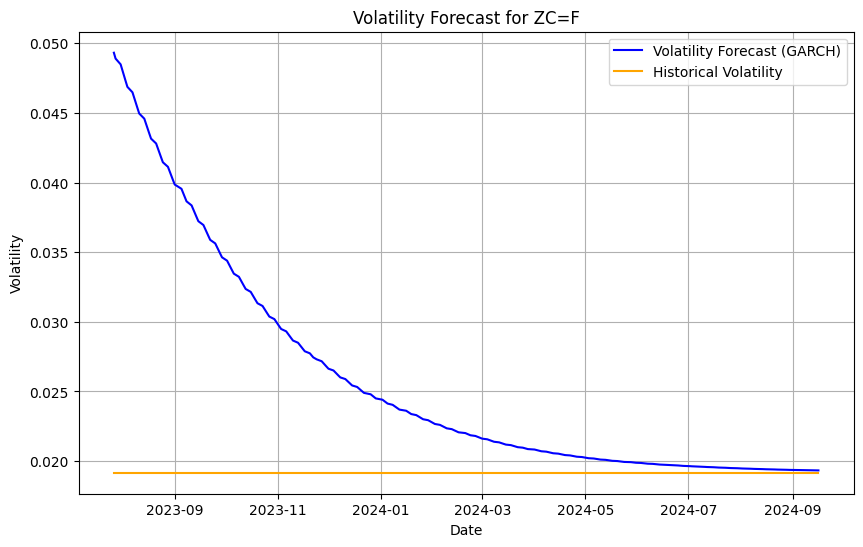

RMSE da previsão de volatilidade: 0.010301384994009493


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Download dos dados
ticker = "ZC=F"
data = yf.download(ticker, start="2019-01-01")

# Verifica se os dados foram baixados corretamente
if data.empty:
    print("Não foi possível baixar os dados.")
    exit()

# Cálculo dos retornos logarítmicos
returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()

# Divisão dos dados em treino e teste
train_size = int(0.8 * len(returns))
train_data, test_data = train_test_split(returns, test_size=0.2, shuffle=False)

# Modelo GARCH
try:
    garch_model = arch_model(train_data, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp='off')
except:
    print("Erro ao ajustar o modelo GARCH.")
    exit()

# Previsão com GARCH
garch_forecast = garch_fit.forecast(horizon=len(test_data))
garch_pred_vol = np.sqrt(garch_forecast.variance.iloc[-len(test_data):]).values.flatten()  # Removendo a dimensão extra

# Volatilidade histórica (usando uma média móvel simples para comparação)
historical_vol = np.std(train_data) * np.ones(len(test_data))  # Mesmo tamanho que test_data

# Visualização da volatilidade
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, garch_pred_vol, label='Volatility Forecast (GARCH)', color='blue')
plt.plot(test_data.index, historical_vol, label='Historical Volatility', color='orange')  # Volatilidade histórica
plt.title(f'Volatility Forecast for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo do RMSE para a previsão de volatilidade
rmse_vol = np.sqrt(mean_squared_error(historical_vol, garch_pred_vol))
print("RMSE da previsão de volatilidade:", rmse_vol)


#Não sei o que eu fiz, amanhã eu estudo os gráficos com mais calma